# Importing Libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing

In [78]:
churn_data = pd.read_csv('Data/churn_data.csv')
churn_data

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [79]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Before developing our models, we need to preprocess our data such as encoding our categorical columns and normalizing our data if needed.

In [80]:
for col in churn_data.columns:
    print(churn_data[col].value_counts())

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
DE     61
NE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
415    1655
510     840
408     838
Name: area code, dtype: int64
405-7119    1
409-7034    1
352-7072    1
358-8025    1
363-8755    1
           ..
356-2093    1
342-7514    1
366-2273    1
350-7344    1
402-1556    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: internati

The following columns will need to be addressed:

* state needs to be one hot encoded as the values are the state's initials
* international plan, voice mail plan, churn should be converted to binary columns

In [81]:
cols = ['voice mail plan', 'international plan']

#Change categorical columns to binary columns
churn_data['voice mail plan'] = churn_data['voice mail plan'].replace({'no': 0, 'yes': 1})
churn_data['international plan'] = churn_data['international plan'].replace({'no': 0, 'yes': 1})
churn_data['churn'] = churn_data.churn.astype('float')

In [82]:
#confirm datatype changes
churn_data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                     float64
dtype: object

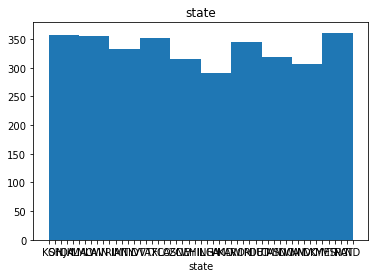

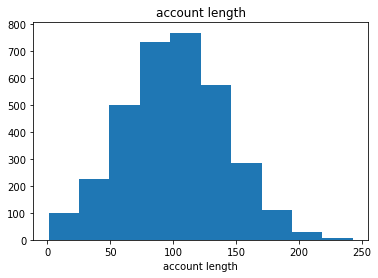

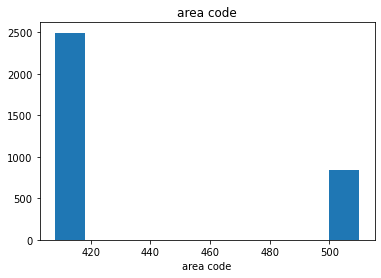

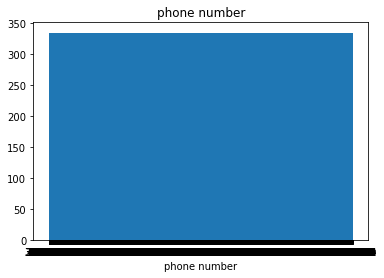

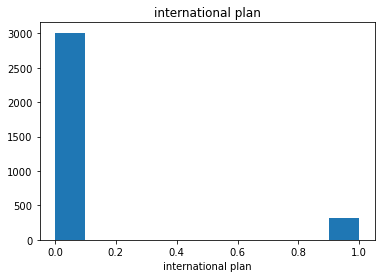

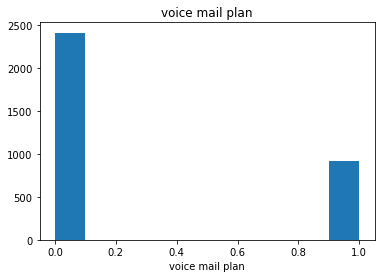

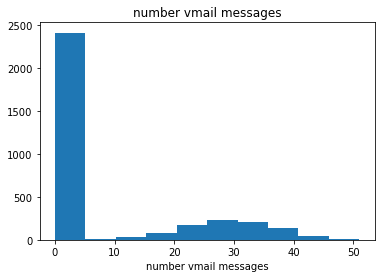

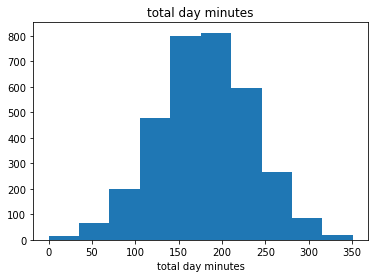

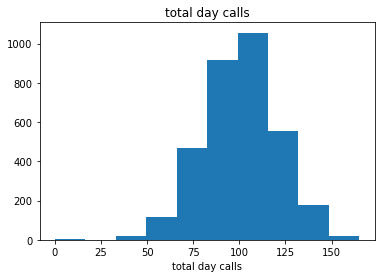

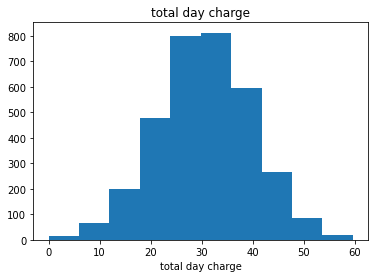

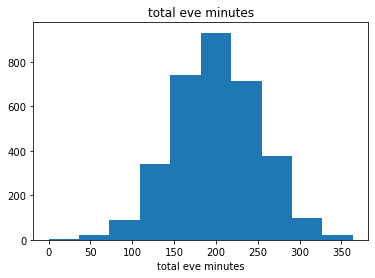

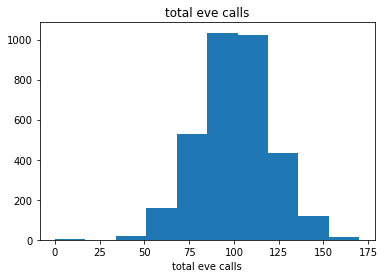

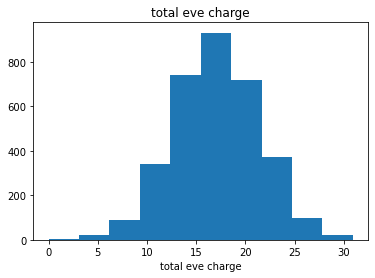

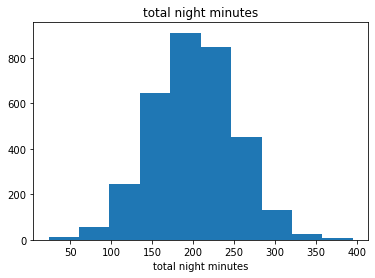

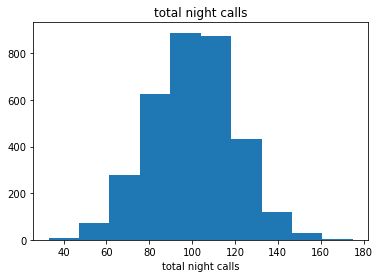

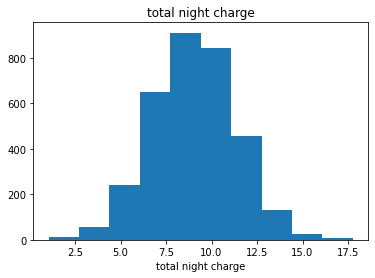

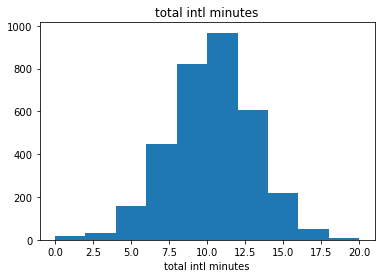

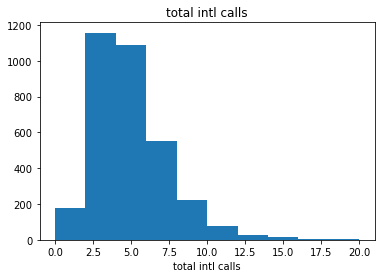

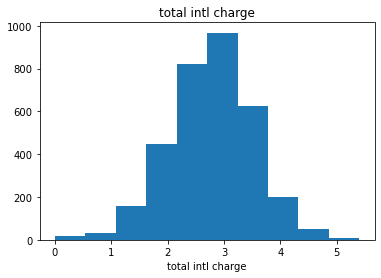

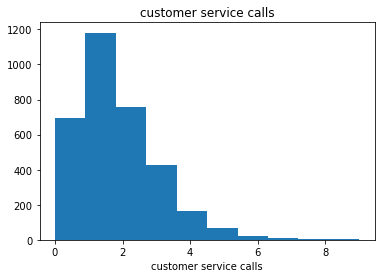

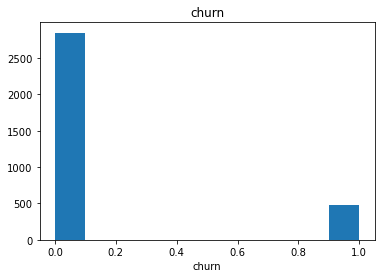

In [83]:
# Loop through each column to see which columns are categorical
for col in churn_data.columns: 
    plt.hist(churn_data[col], label=col)
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [84]:
churn_data.corr()

account length  area code  international plan  \
account length                1.000000  -0.012463            0.024735   
area code                    -0.012463   1.000000            0.048551   
international plan            0.024735   0.048551            1.000000   
voice mail plan               0.002918  -0.000747            0.006006   
number vmail messages        -0.004628  -0.001994            0.008745   
total day minutes             0.006216  -0.008264            0.049396   
total day calls               0.038470  -0.009646            0.003755   
total day charge              0.006214  -0.008264            0.049398   
total eve minutes            -0.006757   0.003580            0.019100   
total eve calls               0.019260  -0.011886            0.006114   
total eve charge             -0.006745   0.003607            0.019106   
total night minutes          -0.008955  -0.005825           -0.028905   
total night calls            -0.013176   0.016522            0.012451   
total night charge           -0.008960  -0.005845           -0.028913   
total intl minutes            0.009514  -0.018288            0.045871   
total intl calls              0.020661  -0.024179            0.017366   
total intl charge             0.009546  -0.018395            0.045780   
customer service calls       -0.003796   0.027572           -0.024522   
churn                         0.016541   0.006174            0.259852   

                        voice mail plan  number vmail messages  \
account length                 0.002918              -0.004628   
area code                     -0.000747              -0.001994   
international plan             0.006006               0.008745   
voice mail plan                1.000000               0.956927   
number vmail messages          0.956927               1.000000   
total day minutes             -0.001684               0.000778   
total day calls               -0.011086              -0.009548   
total day charge              -0.001686               0.000776   
total eve minutes              0.021545               0.017562   
total eve calls               -0.006444              -0.005864   
total eve charge               0.021559               0.017578   
total night minutes            0.006079               0.007681   
total night calls              0.015553               0.007123   
total night charge             0.006064               0.007663   
total intl minutes            -0.001318               0.002856   
total intl calls               0.007618               0.013957   
total intl charge             -0.001276               0.002884   
customer service calls        -0.017824              -0.013263   
churn                         -0.102148              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
international plan               0.049396         0.003755          0.049398   
voice mail plan                 -0.001684        -0.011086         -0.001686   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155 

<AxesSubplot:>

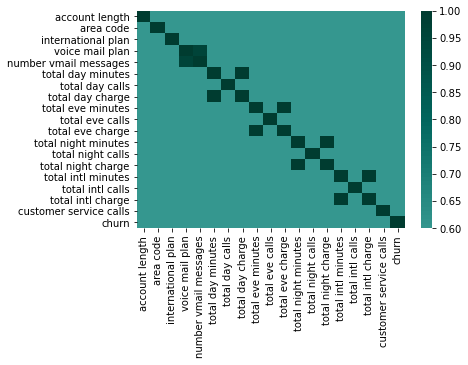

In [86]:
sns.heatmap(churn_data.corr(), center=0, cmap='BrBG',vmin = 0.60)

In [70]:
# One hot encoding for 'State' column
churn_data = pd.get_dummies(churn_data, columns = ['state'])
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [72]:
#Removing unnecessary columns
churn_data = churn_data.drop(columns = ['phone number', 'area code'])

In [75]:
#Confirming changes
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

account length  international plan  voice mail plan  \
account length               1.000000            0.024735         0.002918   
international plan           0.024735            1.000000         0.006006   
voice mail plan              0.002918            0.006006         1.000000   
number vmail messages       -0.004628            0.008745         0.956927   
total day minutes            0.006216            0.049396        -0.001684   
...                               ...                 ...              ...   
state_VT                     0.012627           -0.007445        -0.019218   
state_WA                     0.003555           -0.017442        -0.039753   
state_WI                    -0.008476            0.002959         0.006313   
state_WV                    -0.025631           -0.018913        -0.001233   
state_WY                     0.018058            0.017134        -0.014735   

                       number vmail messages  total day minutes  \
account length                     -0.004628           0.006216   
international plan                  0.008745           0.049396   
voice mail plan                     0.956927          -0.001684   
number vmail messages               1.000000           0.000778   
total day minutes                   0.000778           1.000000   
...                                      ...                ...   
state_VT                           -0.016959           0.006200   
state_WA                           -0.036747          -0.002695   
state_WI                            0.002070          -0.001832   
state_WV                            0.008308          -0.019383   
state_WY                           -0.017748           0.001115   

                       total day calls  total day charge  total eve minutes  \
account length                0.038470          0.006214          -0.006757   
international plan            0.003755          0.049398           0.019100   
voice mail plan              -0.011086         -0.001686           0.021545   
number vmail messages        -0.009548          0.000776           0.017562   
total day minutes             0.006750          1.000000           0.007043   
...                                ...               ...                ...   
state_VT                     -0.000797          0.006207           0.012950   
state_WA                      0.005393         -0.002697           0.007933   
state_WI                     -0.028977         -0.001839          -0.010750   
state_WV                      0.030234         -0.019380          -0.044919   
state_WY                      0.013681          0.001107           0.014704   

                       total eve calls  total eve charge  ...  state_SD  \
account length                0.019260         -0.006745  ...  0.014912   
international plan            0.006114          0.019106  ... -0.006214   
voice mail plan              -0.006444          0.021559  ...  0.022208   
number vmail messages        -0.005864          0.017578  ...  0.023093   
total day minutes             0.015769          0.007029  ...  0.024650   
...                                ...               ...  ...       ...   
state_VT                     -0.018353          0.012966  ... -0.020261   
state_WA                     -0.031195          0.007938  ... -0.019244   
state_WI                     -0.004475         -0.010741  ... -0.020959   
state_WV                     -0.018722         -0.044945  ... -0.024539   
state_WY                     -0.006798          0.014692  ... -0.020821   

                       state_TN  state_TX  state_UT  state_VA  state_VT  \
account length        -0.026651 -0.013148 -0.000397  0.018810  0.012627   
international plan     0.007003 -0.006819 -0.006819  0.010383 -0.007445   
voice mail plan       -0.003545 -0.018072  0.000382 -0.014735 -0.019218   
number vmail messages -0.009857 -0.017963  0.004353 -0.011911 -0.016959   
total day minutes     -0.009345  0.004752  0.010353 -0.0